In [1]:
import pandas as pd
import numpy as np 
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.decomposition import LatentDirichletAllocation

import numpy as np
import pandas as pd
import seaborn as sn
import seaborn as sns
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import neattext.functions as nfx
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
import pickle
from sklearn.preprocessing import LabelEncoder
import keras
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prashantkarna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import pandas as pd
data = pd.read_csv('/Users/prashantkarna/Documents/Research Materials/Datasets/Suicide_Detection.csv')
data['class'] = data['class'].replace(['suicide'], 1)
data['class'] = data['class'].replace(['non-suicide'], 0)



In [3]:
# import pandas as pd
# data2 = pd.read_csv('/Users/prashantkarna/Documents/Research Materials/Datasets/depression_dataset_reddit_cleaned.csv')
# # rename the columns
# data2 = data2.rename(columns={'clean_text': 'text', 'is_depression': 'class'})

In [4]:
# data = pd.concat([data1,data2])
# data.shape

In [5]:
print(data.columns)

Index(['Unnamed: 0', 'text', 'class'], dtype='object')


In [6]:
import numpy as np
data = data.drop('Unnamed: 0', axis=1)


In [7]:
data.shape

(232074, 2)

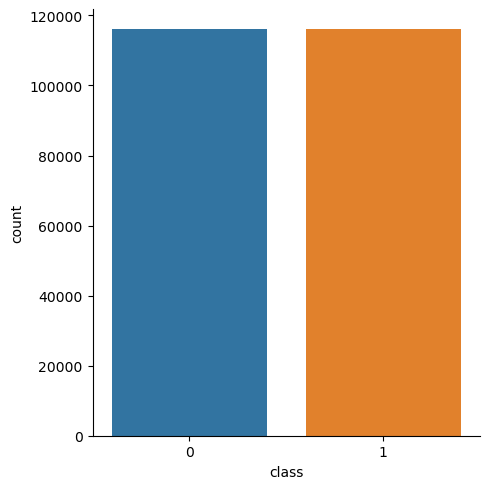

In [8]:
sns.catplot(x="class", kind="count",  data= data)
# plt.savefig('type.png')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
class,232074.0,0.5,0.500001,0.0,0.0,0.5,1.0,1.0


In [10]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [11]:
data_corr = data.corr()
data_corr

,class
class,1.0


In [12]:
# plt.figure(figsize = [36, 27])

# sns.heatmap(data.corr(), cmap = 'RdYlGn', annot = True, vmax = 0.7, vmin = -0.7);
# plt.title('Pair-wise correlation coefficients across attributes');

# # plt.savefig('cor_all.png')

In [13]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashantkarna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
X = data.drop('class', axis=1)
y = data['class']


In [15]:
y_arr = pd.Series(y)

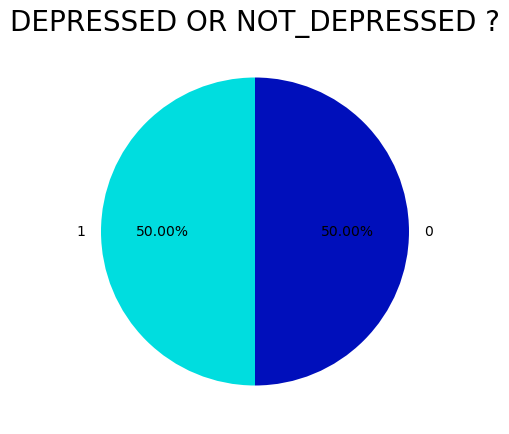

In [16]:
plt.figure(figsize=(10,5))
plt.pie(y_arr.value_counts(),startangle=90,colors=['#00dddf','#000fbb'],
       autopct='%0.2f%%',labels=['1','0'])
plt.title('DEPRESSED OR NOT_DEPRESSED ?',fontdict={'size':20})
plt.show()


In [17]:
# To remove emails
email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
regexes_to_remove = [email_regex, r'Subject:', r'Re:']

for i in range(0, len(X)):
    # removing all special charachter
    review = re.sub('[^a-zA-Z]', ' ', str(X['text'][i]))
    # make document as lowerCase
    review = review.lower()
    # splitting the documents into words for ex ['iam', 'omar']
    review = review.split()
    # make lemmatization --> (change, changing, changes)---> (change)
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    # join the document agian
    review = ' '.join(review)
    
    # removing mails
    for r in regexes_to_remove:
        X['text'][i] = re.sub(r, '', review)


In [18]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X['text'])

In [19]:
# map integer token IDs back to words
word_index = tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [20]:
word_freq=pd.DataFrame(tokenizer.word_counts.items(),columns=['word','count']).sort_values(by='count',ascending=False)

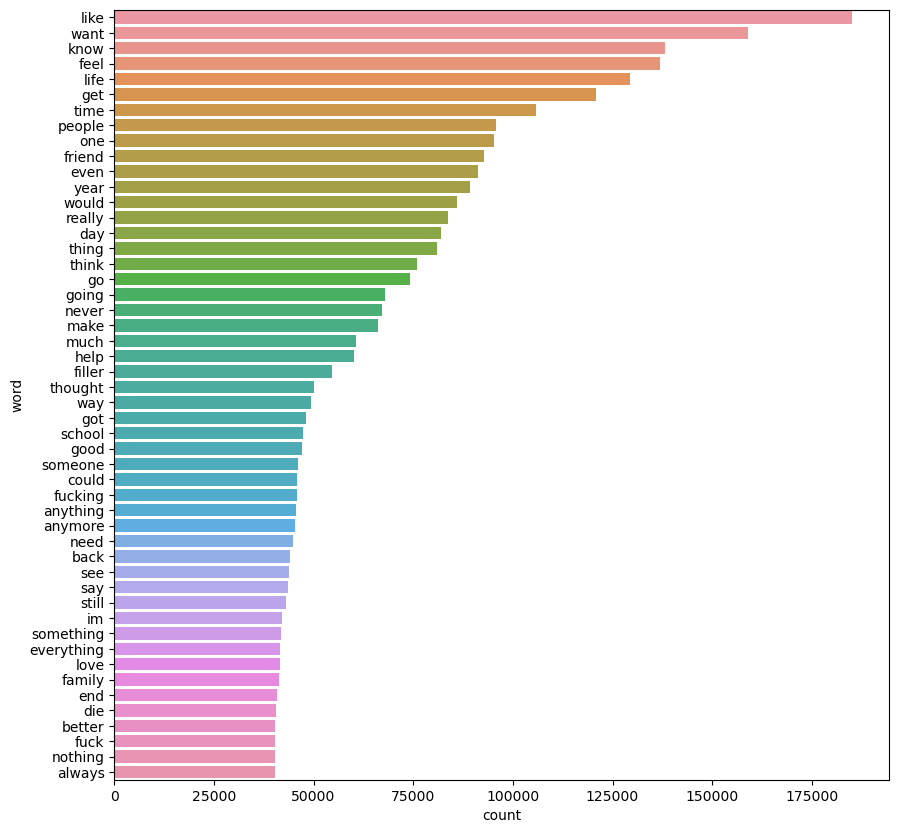

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x='count',y='word',data=word_freq.iloc[:50])
plt.show()

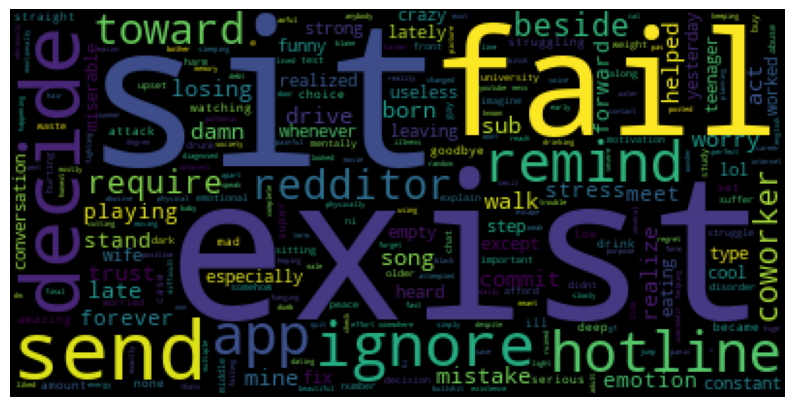

In [22]:
feature_names=word_freq['word'].values
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(10,15))
plt.axis('off')
plt.imshow(wc)

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer_uni = TfidfVectorizer(max_features=10000,ngram_range=(1,1))
tfidf_vectorizer_bi = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
tfidf_vectorizer_tri = TfidfVectorizer(max_features=10000, ngram_range=(1,3))

X_tfidf = tfidf_vectorizer.fit_transform(X['text'])
# X_tfidf_test = tfidf_vectorizer.transform(X['text'])

X_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X['text'])
# X_tfidf_test_uni = tfidf_vectorizer_uni.transform(X['text'])

X_tfidf_bi = tfidf_vectorizer_bi.fit_transform(X['text'])
# X_tfidf_test_bi =tfidf_vectorizer_bi.transform(X'text'])

X_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X['text'])
# X_tfidf_test_tri = tfidf_vectorizer_tri.transform(X_test['text'])

In [24]:
# vectorizer = CountVectorizer()
  
# X_bow = vectorizer.fit_transform(X['text'])

In [25]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# def get_vader_scores(data):
#     sid=SIA()
#     vader_df=data.copy()
#     vader_df['scores'] = vader_df['text'].apply(lambda txt: sid.polarity_scores(str(txt)))
    
#     vader_df['neg_score'] = vader_df['scores'].apply(lambda txt: txt['neg'])
#     vader_df['neu_score'] =vader_df['scores'].apply(lambda txt: txt['neu'])
#     vader_df['pos_score'] = vader_df['scores'].apply(lambda txt: txt['pos'])
#     vader_df['compound'] = vader_df['scores'].apply(lambda txt: txt['compound'])
#     vader_df.drop('scores', axis=1, inplace=True)
#     vader_df.drop('text', axis=1, inplace=True)
#     return vader_df


In [26]:
# X_vader = get_vader_scores(X)

In [27]:
# pip install --upgrade gensim


In [28]:
# import gensim
# import nltk
# nltk.download('punkt')

# # Tokenize the text data into sentences and words
# sentences = [nltk.word_tokenize(doc) for doc in X['text']]

# # Train a word2vec model on the tokenized text data
# model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# # Save the trained model to disk
# model.save('/Users/prashantkarna/Documents/Research Materials/final code/pretrained_model.bin')


In [29]:
# import numpy as np 
# # Convert the text data into word2vec vectors
# X_word2vec = []
# for doc in X['text']:
#     doc_vec = []
#     for word in doc.split():
#         if word in model.wv.key_to_index:
#             doc_vec.append(model.wv[word])
#     if doc_vec:
#         X_word2vec.append(np.mean(doc_vec, axis=0))
#     else:
#         X_word2vec.append(np.zeros(model.vector_size))
# X_word2vec = np.array(X_word2vec,dtype=np.int64)


In [30]:
# from sklearn.decomposition import PCA

# # Apply PCA to X_tfidf
# pca = PCA(n_components=500)
# X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

# # Apply PCA to X_tfidf_uni
# pca_uni = PCA(n_components=500)
# X_tfidf_uni_pca = pca_uni.fit_transform(X_tfidf_uni.toarray())

# # Apply PCA to X_tfidf_bi
# pca_bi = PCA(n_components=500)
# X_tfidf_bi_pca = pca_bi.fit_transform(X_tfidf_bi.toarray())

# # Apply PCA to X_tfidf_tri
# pca_tri = PCA(n_components=500)
# X_tfidf_tri_pca = pca_tri.fit_transform(X_tfidf_tri.toarray())


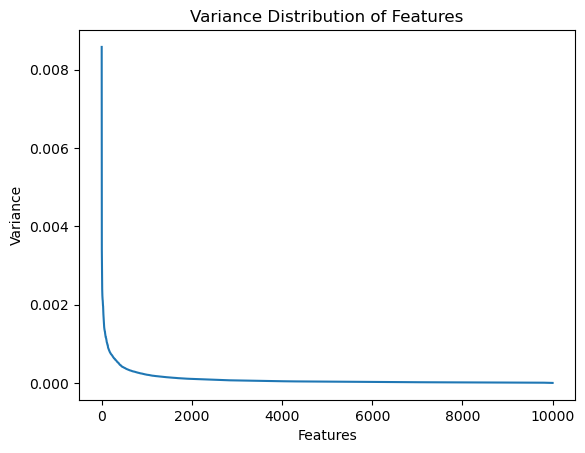

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the variance of each feature
variances = np.var(X_tfidf.toarray(), axis=0)

# Sort the variances in descending order
sorted_variances = np.sort(variances)[::-1]

# Plot the variance distribution
plt.plot(sorted_variances)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance Distribution of Features")
plt.show()

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Feature selection using ExtraTreesClassifier and SelectFromModel

selector = SelectFromModel(ExtraTreesClassifier(n_estimators=300, random_state=42), threshold=-np.inf, max_features=1500)

                                        
# Unigram feature selection
selector_tfidf= selector.fit(X_tfidf, y)
X_selection_normalized = selector_tfidf.transform(X_tfidf)


# Unigram feature selection
selector_uni= selector.fit(X_tfidf_uni, y)
X_selection_uni_normalized = selector_uni.transform(X_tfidf_uni)

# Bigram feature selection
selector_bi = selector.fit(X_tfidf_bi, y)
X_selection_bi_normalized = selector_bi.transform(X_tfidf_bi)

# Trigram feature selection
selector_tri= selector.fit(X_tfidf, y)
X_selection_tri_normalized = selector_tri.transform(X_tfidf)

In [47]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel
# from sklearn.preprocessing import LabelEncoder, normalize

# # Label encoding
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Feature selection using ExtraTreesClassifier and SelectFromModel
# selector = SelectFromModel(ExtraTreesClassifier(n_estimators=300, random_state=42), threshold=-np.inf, max_features=1000)

# # Unigram feature selection
# selector_tfidf = selector.fit(X_tfidf, y_encoded)
# X_selection = selector_tfidf.transform(X_tfidf)

# # Unigram feature selection
# selector_uni = selector.fit(X_tfidf_uni, y_encoded)
# X_selection_uni = selector_uni.transform(X_tfidf_uni)

# # Bigram feature selection
# selector_bi = selector.fit(X_tfidf_bi, y_encoded)
# X_selection_bi = selector_bi.transform(X_tfidf_bi)

# # Trigram feature selection
# selector_tri = selector.fit(X_tfidf, y_encoded)
# X_selection_tri = selector_tri.transform(X_tfidf)

# # Normalization
# X_selection_normalized = normalize(X_selection)
# X_selection_uni_normalized = normalize(X_selection_uni)
# X_selection_bi_normalized = normalize(X_selection_bi)
# X_selection_tri_normalized = normalize(X_selection_tri)


In [48]:
# # Feature selection using ExtraTreesClassifier and SelectFromModel

# selector = SelectFromModel(ExtraTreesClassifier(n_estimators=300, random_state=42), max_features=300)

# # # Word2Vec feature selection
# # selector_word2vec = selector.fit(X_word2vec, y)
# # X_selection_word2vec = selector_word2vec.transform(X_word2vec)

In [49]:
# # Bag-of-words feature selection
# selector_bow = selector.fit(X_bow, y)
# X_selection_bow = selector_bow.transform(X_bow)


In [50]:
# # vader feature selection
# selector_vader= selector.fit(X_vader, y)
# X_selection_vader = selector_vader.transform(X_vader)

In [51]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder

# # Set up Stratified KFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Define classifiers
# svm = LinearSVC()
# lr = LogisticRegression(C= 1,max_iter=10000, solver='saga')
# nb = MultinomialNB()
# xgb = XGBClassifier(random_state=42)
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Define lists to store accuracy scores
# svm_acc = []
# lr_acc = []
# nb_acc = []
# rf_acc = []
# xgb_acc = []

# # Perform stratified k-fold cross-validation on selected features
# for train_index, test_index in skf.split(X_selection_bow, y):
#     # Split data into training and testing sets
#     X_train, X_test = X_selection_bow[train_index], X_selection_bow[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Fit and predict using LinearSVC
#     svm.fit(X_train, y_train)
#     svm_pred = svm.predict(X_test)
#     svm_acc.append(accuracy_score(y_test, svm_pred))
#     print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
#     # Fit and predict using Logistic Regression
#     lr.fit(X_train, y_train)
#     lr_pred = lr.predict(X_test)
#     lr_acc.append(accuracy_score(y_test, lr_pred))
#     print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
#     # Fit and predict using Naive Bayes
#     nb.fit(X_train, y_train)
#     nb_pred = nb.predict(X_test)
#     nb_acc.append(accuracy_score(y_test, nb_pred))
#     print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

#     # Fit and predict using XGBoost Classifier
#     xgb.fit(X_train, y_train, eval_metric='error')
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc.append(accuracy_score(y_test, xgb_pred))

#     # Print classification report
#     print("XGBoost Classifier bi classification report:\n", classification_report(y_test, xgb_pred))

#     # Fit and predict using Random Forest Classifier
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc.append(accuracy_score(y_test, rf_pred))

#     # Print classification report
#     print("Random Forest classification report:\n", classification_report(y_test, rf_pred))

In [52]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder

# # Set up Stratified KFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Define classifiers
# svm = LinearSVC()
# lr = LogisticRegression(C= 1,max_iter=10000, solver='saga')
# nb = GaussianNB()
# xgb = XGBClassifier(random_state=42)
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Define lists to store accuracy scores
# svm_acc = []
# lr_acc = []
# nb_acc = []
# rf_acc = []
# xgb_acc = []

# # Perform stratified k-fold cross-validation on selected features
# for train_index, test_index in skf.split(X_selection_vader, y):
#     # Split data into training and testing sets
#     X_train, X_test = X_selection_vader[train_index], X_selection_vader[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Fit and predict using LinearSVC
#     svm.fit(X_train, y_train)
#     svm_pred = svm.predict(X_test)
#     svm_acc.append(accuracy_score(y_test, svm_pred))
#     print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
#     # Fit and predict using Logistic Regression
#     lr.fit(X_train, y_train)
#     lr_pred = lr.predict(X_test)
#     lr_acc.append(accuracy_score(y_test, lr_pred))
#     print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
#     # # Fit and predict using Naive Bayes
#     # nb.fit(X_train, y_train)
#     # nb_pred = nb.predict(X_test)
#     # nb_acc.append(accuracy_score(y_test, nb_pred))
#     # print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

#     # Fit and predict using XGBoost Classifier
#     xgb.fit(X_train, y_train, eval_metric='error')
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc.append(accuracy_score(y_test, xgb_pred))

#     # Print classification report
#     print("XGBoost Classifier bi classification report:\n", classification_report(y_test, xgb_pred))

#     # Fit and predict using Random Forest Classifier
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc.append(accuracy_score(y_test, rf_pred))

#     # Print classification report
#     print("Random Forest classification report:\n", classification_report(y_test, rf_pred))

In [53]:
# # extracted features to csv
# X_df = pd.DataFrame(X_selection.todense())
# X_df.to_csv('/Users/prashantkarna/Documents/Research Materials/final code/feature_dataset.csv', index=False)

In [54]:
# # extracted features to cs
# X_df_uni = pd.DataFrame(X_selection_uni.todense())
# X_df_uni.to_csv('/Users/prashantkarna/Documents/Research Materials/final code/final_feature_uni_dataset.csv', index=False)

In [55]:
# # extracted features to csv
# X_df_bi = pd.DataFrame(X_selection_bi.todense())
# X_df_bi.to_csv('/Users/prashantkarna/Documents/Research Materials/final code/final_feature_bi_dataset.csv', index=False)

In [56]:
# # extracted features to csv
# X_df_tri = pd.DataFrame(X_selection_tri.todense())
# X_df_tri.to_csv('/Users/prashantkarna/Documents/Research Materials/final code/final_feature_tri_dataset.csv', index=False)

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Set up Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
svm = LinearSVC(C=1.0,dual=False, max_iter=1000,random_state=42)
lr = LogisticRegression(C = 1, max_iter=10000, solver='saga')
nb = MultinomialNB()
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define lists to store accuracy scores
svm_acc = []
lr_acc = []
nb_acc = []
rf_acc = []
xgb_acc = []

# Perform stratified k-fold cross-validation on selected features
for train_index, test_index in skf.split(X_selection_normalized, y):
    # Split data into training and testing sets
    X_train, X_test = X_selection_normalized[train_index], X_selection_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit and predict using LinearSVC
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_acc.append(accuracy_score(y_test, svm_pred))
    print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
    # Fit and predict using Logistic Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_acc.append(accuracy_score(y_test, lr_pred))
    print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
    # Fit and predict using Naive Bayes
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    nb_acc.append(accuracy_score(y_test, nb_pred))
    print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

    # Fit and predict using Random Forest Classifier
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    # Calculate accuracy and print classification report
    rf_acc = accuracy_score(y_test, rf_pred)
    print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

    # Fit and predict using XGBoost Classifier
    xgb.fit(X_train, y_train, eval_metric='error')
    xgb_pred = xgb.predict(X_test)
    xgb_acc.append(accuracy_score(y_test, xgb_pred))

    # Print classification report
    print("XGBoost Classifier bi classification report:\n", classification_report(y_test, xgb_pred))

    

# Print best accuracy score for each classifier
print("LinearSVC best accuracy:", np.mean(svm_acc))
print("Logistic Regression best accuracy:", np.mean(lr_acc))
print("Naive Bayes best accuracy:", np.mean(nb_acc))
print("Random Forest best accuracy:", np.mean(rf_acc))
print("XGB best accuracy:", np.mean(xgb_acc))

LinearSVC classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     23207
           1       0.94      0.92      0.93     23208

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     23207
           1       0.94      0.91      0.93     23208

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     23207
           1       0.84      0.94      0.88     23208

    accuracy                           0.88     46415
   macro avg  

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Set up Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
svm = LinearSVC()
lr = LogisticRegression(C= 1,max_iter=10000, solver='saga')
nb = MultinomialNB(alpha=0.01)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define lists to store accuracy scores
svm_acc = []
lr_acc = []
nb_acc = []
rf_acc = []
xgb_acc = []

# Perform stratified k-fold cross-validation on selected features
for train_index, test_index in skf.split(X_selection_bi_normalized, y):
    # Split data into training and testing sets
    X_train, X_test = X_selection_bi_normalized[train_index], X_selection_bi_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit and predict using LinearSVC
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_acc.append(accuracy_score(y_test, svm_pred))
    print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
    # Fit and predict using Logistic Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_acc.append(accuracy_score(y_test, lr_pred))
    print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
    # Fit and predict using Naive Bayes
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    nb_acc.append(accuracy_score(y_test, nb_pred))
    print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

    # Fit and predict using Random Forest Classifier
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)

    # Calculate accuracy and print classification report
    rf_acc = accuracy_score(y_test, rf_pred)
    print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

    # Fit and predict using XGBoost Classifier
    xgb.fit(X_train, y_train, eval_metric='error')
    xgb_pred = xgb.predict(X_test)
    xgb_acc.append(accuracy_score(y_test, xgb_pred))

    # Print classification report
    print("XGBoost Classifier classification report:\n", classification_report(y_test, xgb_pred))

# Print best accuracy score for each classifier
print("LinearSVC best accuracy:", np.mean(svm_acc))
print("Logistic Regression best accuracy:", np.mean(lr_acc))
print("Naive Bayes best accuracy:",np.mean(nb_acc))
print("XGBoost best accuracy:", np.mean(xgb_acc))
print("Random Forest Accuracy:", np.mean(rf_acc))



LinearSVC classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     23207
           1       0.94      0.92      0.93     23208

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     23207
           1       0.94      0.92      0.93     23208

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     23207
           1       0.84      0.94      0.89     23208

    accuracy                           0.88     46415
   macro avg  

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Set up Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
svm = LinearSVC(C=1.0,dual=False, max_iter=1000,random_state=42)
lr = LogisticRegression(C = 1, max_iter=10000, solver='saga')
nb = MultinomialNB()
xgb = XGBClassifier(random_state=42)

# Define lists to store accuracy scores
svm_acc = []
lr_acc = []
nb_acc = []
rf_acc = []
xgb_acc = []

# Perform stratified k-fold cross-validation on selected features
for train_index, test_index in skf.split(X_selection_tri_normalized, y):
    # Split data into training and testing sets
    X_train, X_test = X_selection_tri_normalized[train_index], X_selection_tri_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit and predict using LinearSVC
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_acc.append(accuracy_score(y_test, svm_pred))
    print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
    # Fit and predict using Logistic Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_acc.append(accuracy_score(y_test, lr_pred))
    print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
    # Fit and predict using Naive Bayes
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    nb_acc.append(accuracy_score(y_test, nb_pred))
    print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

    # Fit and predict using Random Forest Classifier
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    # Calculate accuracy and print classification report
    rf_acc = accuracy_score(y_test, rf_pred)
    print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

    # Fit and predict using XGBoost Classifier
    xgb.fit(X_train, y_train, eval_metric='error')
    xgb_pred = xgb.predict(X_test)
    xgb_acc.append(accuracy_score(y_test, xgb_pred))

    # Print classification report
    print("XGBoost Classifier bi classification report:\n", classification_report(y_test, xgb_pred))

    

# Print best accuracy score for each classifier
print("LinearSVC best accuracy:", np.mean(svm_acc))
print("Logistic Regression best accuracy:", np.mean(lr_acc))
print("Naive Bayes best accuracy:", np.mean(nb_acc))
print("Random Forest best accuracy:", np.mean(rf_acc))
print("XGB best accuracy:", np.mean(xgb_acc))

LinearSVC classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     23207
           1       0.94      0.92      0.93     23208

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     23207
           1       0.94      0.91      0.93     23208

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     23207
           1       0.84      0.94      0.88     23208

    accuracy                           0.88     46415
   macro avg  

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Set up Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
svm = LinearSVC()
lr = LogisticRegression(C= 10,max_iter=10000, solver='saga')
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(random_state=42) 

# Define lists to store accuracy scores
svm_acc = []
lr_acc = []
nb_acc = []
rf_acc = []
xgb_acc = []

# Perform stratified k-fold cross-validation on selected features
for train_index, test_index in skf.split(X_selection_uni_normalized, y):
    # Split data into training and testing sets
    X_train, X_test = X_selection_uni_normalized[train_index], X_selection_uni_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit and predict using LinearSVC
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_acc.append(accuracy_score(y_test, svm_pred))
    print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
    # Fit and predict using Logistic Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_acc.append(accuracy_score(y_test, lr_pred))
    print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
    # Fit and predict using Naive Bayes
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    nb_acc.append(accuracy_score(y_test, nb_pred))
    print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

    # Fit and predict using Random Forest Classifier
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_acc.append(accuracy_score(y_test, rf_pred))
    # Print classification report
    print("Random Forest classification report:\n", classification_report(y_test, rf_pred))

    # Fit and predict using XGBoost Classifier
    xgb.fit(X_train, y_train, eval_metric='error')
    xgb_pred = xgb.predict(X_test)
    xgb_acc.append(accuracy_score(y_test, xgb_pred))

    # Print classification report
    print("XGBoost Classifier classification report:\n", classification_report(y_test, xgb_pred))



# Print best accuracy score for each classifier
print("LinearSVC best accuracy:", np.mean(svm_acc))
print("Logistic Regression best accuracy:", np.mean(lr_acc))
print("Naive Bayes best accuracy:", np.mean(nb_acc))
print("Random Forest best accuracy:", np.mean(rf_acc))
print("XGBoost Classifier bi best accuracy:", np.mean(xgb_acc))


LinearSVC classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     23207
           1       0.94      0.92      0.93     23208

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     23207
           1       0.94      0.92      0.93     23208

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     23207
           1       0.84      0.94      0.88     23208

    accuracy                           0.88     46415
   macro avg  

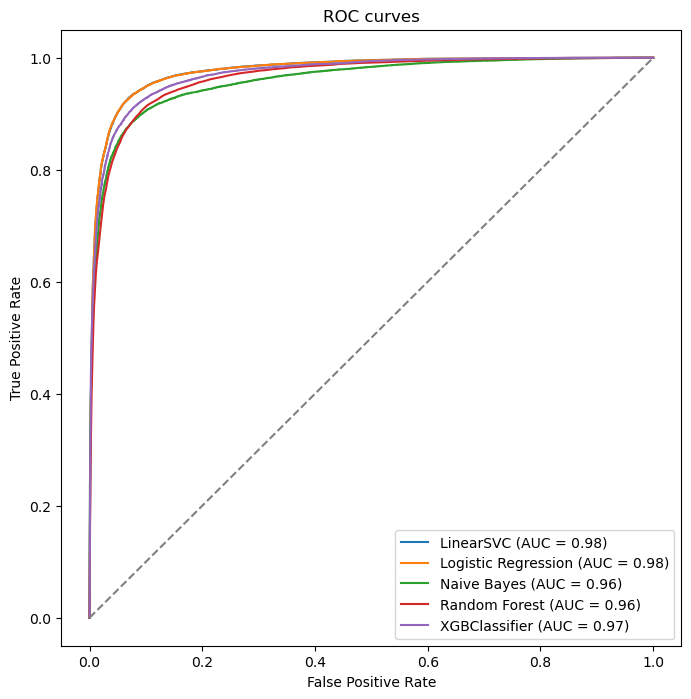

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure to plot the ROC curves
fig, ax = plt.subplots(figsize=(8, 8))
X_train, X_test, y_train, y_test = train_test_split(X_selection_uni_normalized, y, test_size=0.2, random_state=42)
# Define the classifiers
classifiers = {'LinearSVC': svm, 'Logistic Regression': lr, 'Naive Bayes': nb, 'Random Forest': rf,'XGBClassifier':xgb}

# Loop through each classifier and plot its ROC curve
for name, clf in classifiers.items():
    # Fit the classifier and predict the probabilities of the positive class
    clf.fit(X_train, y_train)
    if hasattr(clf, 'decision_function'):
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve and its AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve and its AUC
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier curve
ax.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Set the labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curves')
ax.legend()
plt.show()


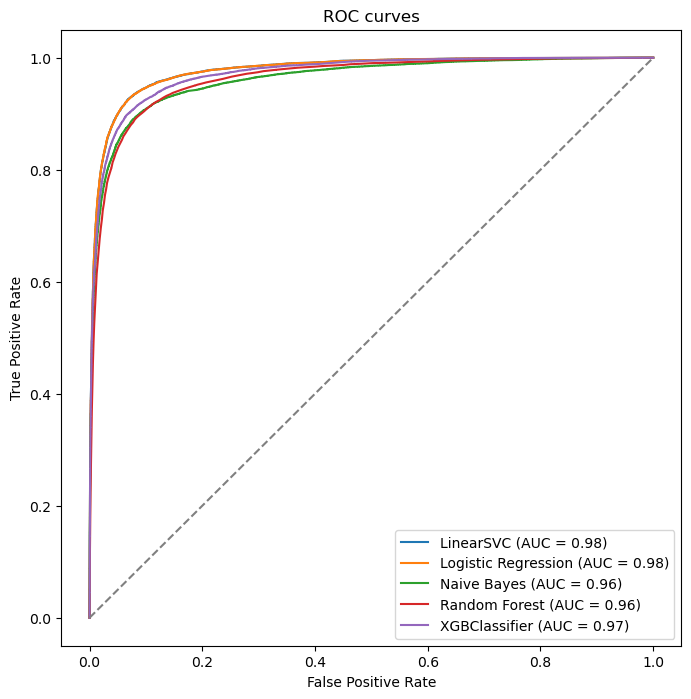

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure to plot the ROC curves
fig, ax = plt.subplots(figsize=(8, 8))
X_train, X_test, y_train, y_test = train_test_split(X_selection_bi_normalized, y, test_size=0.2, random_state=42)
# Define the classifiers
classifiers = {'LinearSVC': svm, 'Logistic Regression': lr, 'Naive Bayes': nb, 'Random Forest': rf,'XGBClassifier':xgb}

# Loop through each classifier and plot its ROC curve
for name, clf in classifiers.items():
    # Fit the classifier and predict the probabilities of the positive class
    clf.fit(X_train, y_train)
    if hasattr(clf, 'decision_function'):
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve and its AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve and its AUC
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier curve
ax.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Set the labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curves')
ax.legend()
plt.show()


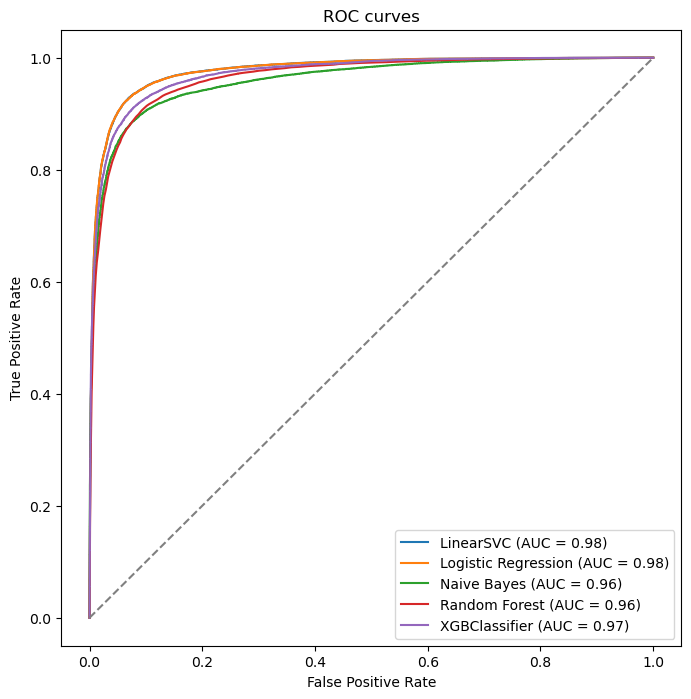

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure to plot the ROC curves
fig, ax = plt.subplots(figsize=(8, 8))
X_train, X_test, y_train, y_test = train_test_split(X_selection_tri_normalized, y, test_size=0.2, random_state=42)
# Define the classifiers
classifiers = {'LinearSVC': svm, 'Logistic Regression': lr, 'Naive Bayes': nb, 'Random Forest': rf,'XGBClassifier':xgb}

# Loop through each classifier and plot its ROC curve
for name, clf in classifiers.items():
    # Fit the classifier and predict the probabilities of the positive class
    clf.fit(X_train, y_train)
    if hasattr(clf, 'decision_function'):
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve and its AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve and its AUC
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier curve
ax.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Set the labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curves')
ax.legend()
plt.show()


In [64]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder

# # Set up Stratified KFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Define classifiers
# svm = LinearSVC()
# lr = LogisticRegression(C= 1,max_iter=10000, solver='saga')
# nb = GaussianNB()
# xgb = XGBClassifier(random_state=42)
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Define lists to store accuracy scores
# svm_acc = []
# lr_acc = []
# nb_acc = []
# rf_acc = []
# xgb_acc = []

# # Perform stratified k-fold cross-validation on selected features
# for train_index, test_index in skf.split(X_selection_word2vec, y):
#     # Split data into training and testing sets
#     X_train, X_test = X_selection_word2vec[train_index], X_selection_word2vec[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Fit and predict using LinearSVC
#     svm.fit(X_train, y_train)
#     svm_pred = svm.predict(X_test)
#     svm_acc.append(accuracy_score(y_test, svm_pred))
#     print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
#     # Fit and predict using Logistic Regression
#     lr.fit(X_train, y_train)
#     lr_pred = lr.predict(X_test)
#     lr_acc.append(accuracy_score(y_test, lr_pred))
#     print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
#     # Fit and predict using Naive Bayes
#     nb.fit(X_train, y_train)
#     nb_pred = nb.predict(X_test)
#     nb_acc.append(accuracy_score(y_test, nb_pred))
#     print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

#     # Fit and predict using XGBoost Classifier
#     xgb.fit(X_train, y_train, eval_metric='error')
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc.append(accuracy_score(y_test, xgb_pred))

#     # Print classification report
#     print("XGBoost Classifier bi classification report:\n", classification_report(y_test, xgb_pred))

#     # Fit and predict using Random Forest Classifier
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc.append(accuracy_score(y_test, rf_pred))

#     # Print classification report
#     print("Random Forest classification report:\n", classification_report(y_test, rf_pred))

# # Print best accuracy score for each classifier
# print("LinearSVC best accuracy:", max(svm_acc))
# print("Logistic Regression best accuracy:", max(lr_acc))
# print("Naive Bayes best accuracy:", max(nb_acc))
# print("XGBoost best accuracy:", max(xgb_acc))
# print("RF best accuracy:", max(rf_acc))



In [65]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder

# # Set up Stratified KFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Define classifiers
# svm = LinearSVC()
# lr = LogisticRegression(C= 1,max_iter=10000, solver='saga')
# nb = GaussianNB()
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# xgb = XGBClassifier(random_state=42)

# # Define lists to store accuracy scores
# svm_acc = []
# lr_acc = []
# nb_acc = []
# rf_acc = []
# xgb_acc = []

# # Perform stratified k-fold cross-validation on selected features
# for train_index, test_index in skf.split(X_word2vec, y):
#     # Split data into training and testing sets
#     X_train, X_test = X_word2vec[train_index], X_word2vec[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Fit and predict using LinearSVC
#     svm.fit(X_train, y_train)
#     svm_pred = svm.predict(X_test)
#     svm_acc.append(accuracy_score(y_test, svm_pred))
#     print("LinearSVC classification report:\n", classification_report(y_test, svm_pred))
    
#     # Fit and predict using Logistic Regression
#     lr.fit(X_train, y_train)
#     lr_pred = lr.predict(X_test)
#     lr_acc.append(accuracy_score(y_test, lr_pred))
#     print("Logistic Regression classification report:\n", classification_report(y_test, lr_pred))
    
#     # Fit and predict using Naive Bayes
#     nb.fit(X_train, y_train)
#     nb_pred = nb.predict(X_test)
#     nb_acc.append(accuracy_score(y_test, nb_pred))
#     print("Naive Bayes classification report:\n", classification_report(y_test, nb_pred))

#     # Fit and predict using XGBoost Classifier
#     xgb.fit(X_train, y_train, eval_metric='error')
#     xgb_pred = xgb.predict(X_test)
#     xgb_acc.append(accuracy_score(y_test, xgb_pred))

#     # Print classification report
#     print("XGBoost Classifier bi classification report:\n", classification_report(y_test, xgb_pred))

#     # Fit and predict using Random Forest Classifier
#     rf.fit(X_train, y_train)
#     rf_pred = rf.predict(X_test)
#     rf_acc.append(accuracy_score(y_test, rf_pred))

#     # Print classification report
#     print("Random Forest classification report:\n", classification_report(y_test, rf_pred))

# # Print best accuracy score for each classifier
# print("LinearSVC best accuracy:", max(svm_acc))
# print("Logistic Regression best accuracy:", max(lr_acc))
# print("Naive Bayes best accuracy:", max(nb_acc))
# print("XGBoost best accuracy:", max(xgb_acc))
# print("RF best accuracy:", max(rf_acc))

